In [1]:
# Importamos librerias 
import matplotlib.pyplot as plt
import plotly.express as px
#import plotly.offline as pyo
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import faker

fake = faker.Faker()

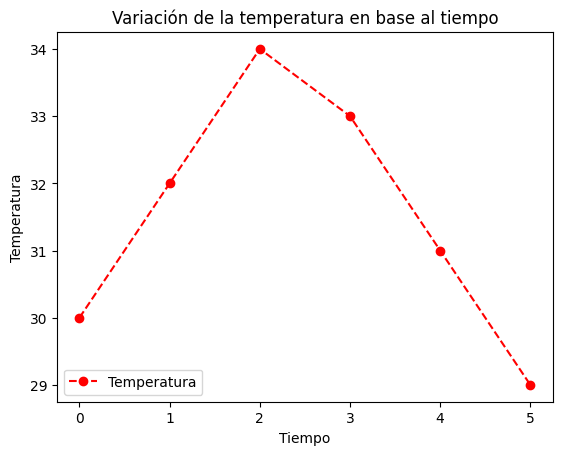

In [27]:
# Relación entre el tiempo y la temperatura
tiempo = [0, 1, 2, 3, 4, 5]
temperatura = [30, 32, 34, 33, 31, 29]

plt.plot(tiempo,temperatura, marker="o", color="red", linestyle="--", label="Temperatura")
plt.title("Variación de la temperatura en base al tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura")
plt.legend(loc="lower left")
plt.show()

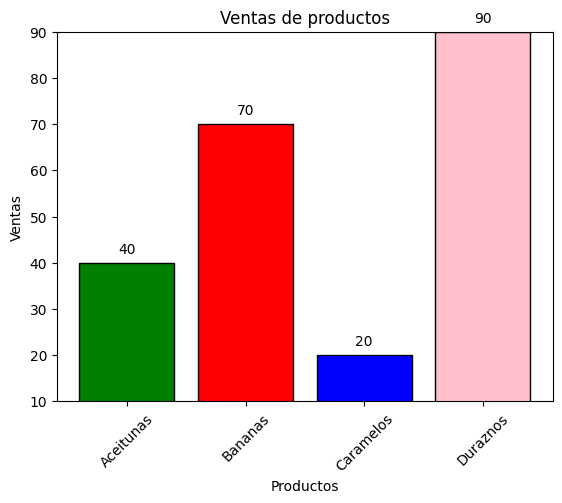

In [2]:
productos = ["Aceitunas", "Bananas", "Caramelos", "Duraznos"]
ventas = [40, 70, 20, 90]

plt.bar(productos,ventas, color=["green","red","blue","pink"],edgecolor="black")
plt.title("Ventas de productos")
plt.xlabel("Productos")
plt.ylim(10,90)
plt.ylabel("Ventas")
plt.xticks(rotation=45)

# Recorrer cada elemento del gráfico para mostrar el número de ventas de cada producto en las barras.
for i, valor in enumerate(ventas):
    plt.text(i, valor + 2, str(valor), ha='center', fontsize=10)

plt.show()

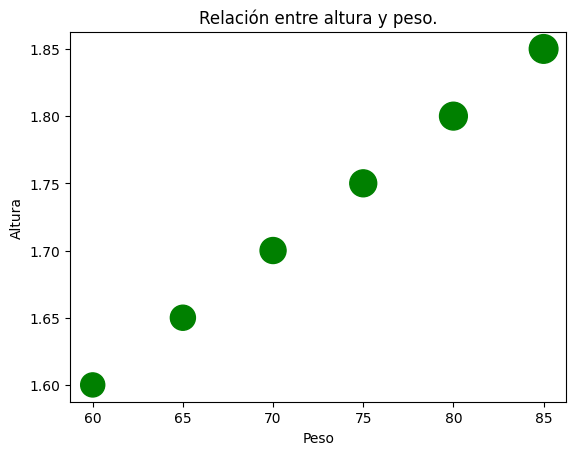

In [40]:
peso = [60, 65, 70, 75, 80, 85] 
altura = [1.60, 1.65, 1.70, 1.75, 1.80, 1.85]

plt.scatter(peso,altura, color="green", s=[p*5 for p in peso]) # Modificamos el tamaño de los puntos en función al peso
plt.title("Relación entre altura y peso.")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

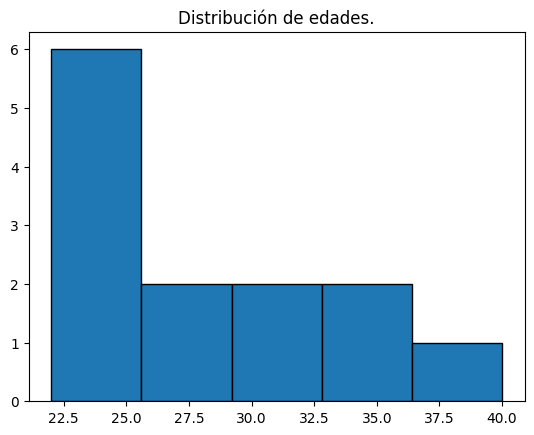

In [55]:
edades = [22, 23, 24, 22, 25, 30, 26, 29, 22, 30, 35, 33, 40]

plt.hist(edades, bins=5, edgecolor='black')
plt.title("Distribución de edades.")
plt.show()

     Productos Trimestre  Ventas
0   Producto_A        Q1    1200
1   Producto_A        Q2    1500
2   Producto_A        Q3    1700
3   Producto_A        Q4    1600
4   Producto_B        Q1    1300
5   Producto_B        Q2    1400
6   Producto_B        Q3    1600
7   Producto_B        Q4    1700
8   Producto_C        Q1     900
9   Producto_C        Q2    1100
10  Producto_C        Q3    1300
11  Producto_C        Q4    1200
12  Producto_D        Q1    1500
13  Producto_D        Q2    1600
14  Producto_D        Q3    1000
15  Producto_D        Q4    1000

     Productos  Total Anual
0   Producto_A         6000
4   Producto_B         6000
8   Producto_C         4500
12  Producto_D         5100


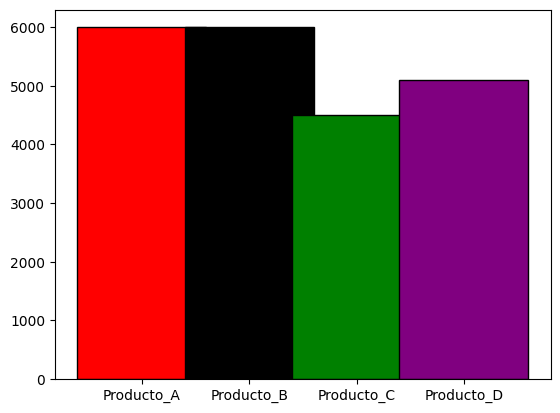

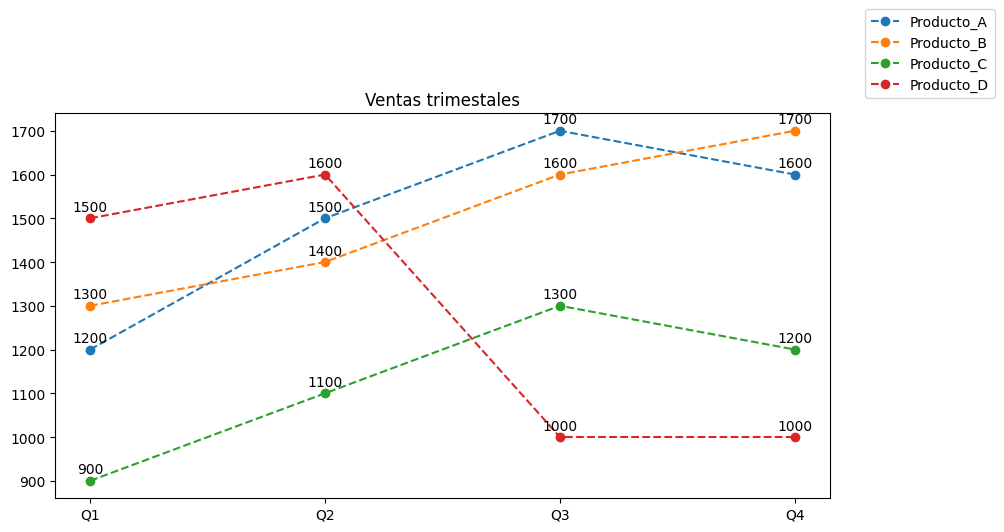

In [3]:
df = pd.read_csv("archivos_csv/ventas_trimestres.csv")
print(f"{df}\n")

df["Total Anual"] = df.groupby('Productos')["Ventas"].transform('sum')
df_anual = df[["Productos","Total Anual"]].drop_duplicates()
print(df_anual)

# Gráfico de barras con las ventas anuales
plt.bar(df_anual["Productos"], df_anual["Total Anual"],width=1.2,color=["red","black","green","purple"],edgecolor="black")
plt.figure(figsize=(10,5))
plt.title("Ventas Anuales")

# Gráfico de lineas con las ventas trimestales de cada producto
# Cada punto en el gráfico representa las ventas en ese trimestre
productos = df["Productos"].unique()
for producto in productos:
    subset = df[df["Productos"] == producto]
    plt.plot(subset["Trimestre"], subset["Ventas"], marker='o', linestyle='--', label=producto)
    for x, y in zip(subset["Trimestre"], subset["Ventas"]):
        plt.text(x, y + 17, str(y), ha='center', fontsize=10)
    
# Mostramos a que producto pertenece cada linea.
plt.legend(loc="center",bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.title("Ventas trimestales")
plt.show()


    first_name  last_name  age  years_experience gender  salary  \
0        Linda      Brown   30                32      M   39430   
1      Michael      Wolfe   61                21      F   39454   
2     Samantha    Johnson   33                31      F   50658   
3      Timothy       Wong   49                14      F   20768   
4      Cameron    Carroll   30                30      M   84890   
..         ...        ...  ...               ...    ...     ...   
295      Harry      Crane   25                35      M   51910   
296  Alexander     Henson   52                23      F   84473   
297     Travis      Ellis   48                38      F   69951   
298     Curtis     Romero   60                 1      M   42951   
299      Katie  Fernandez   58                35      F   38858   

           department  average  
0               Legal     True  
1           Marketing     True  
2     Soporte Técnico     True  
3    Recursos Humanos    False  
4           Marketing     True

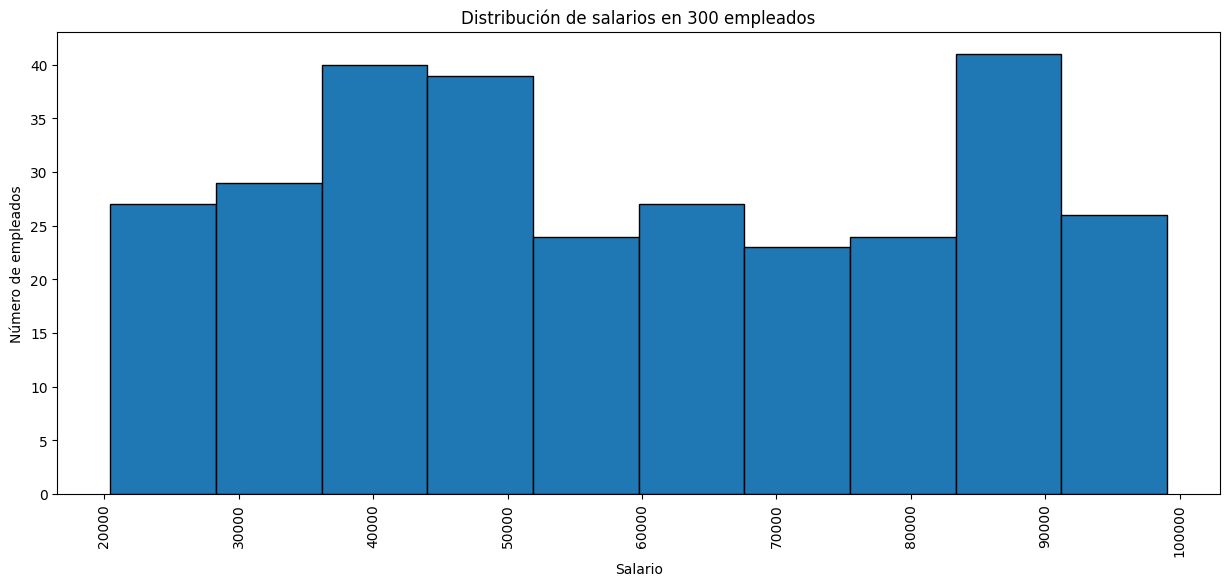

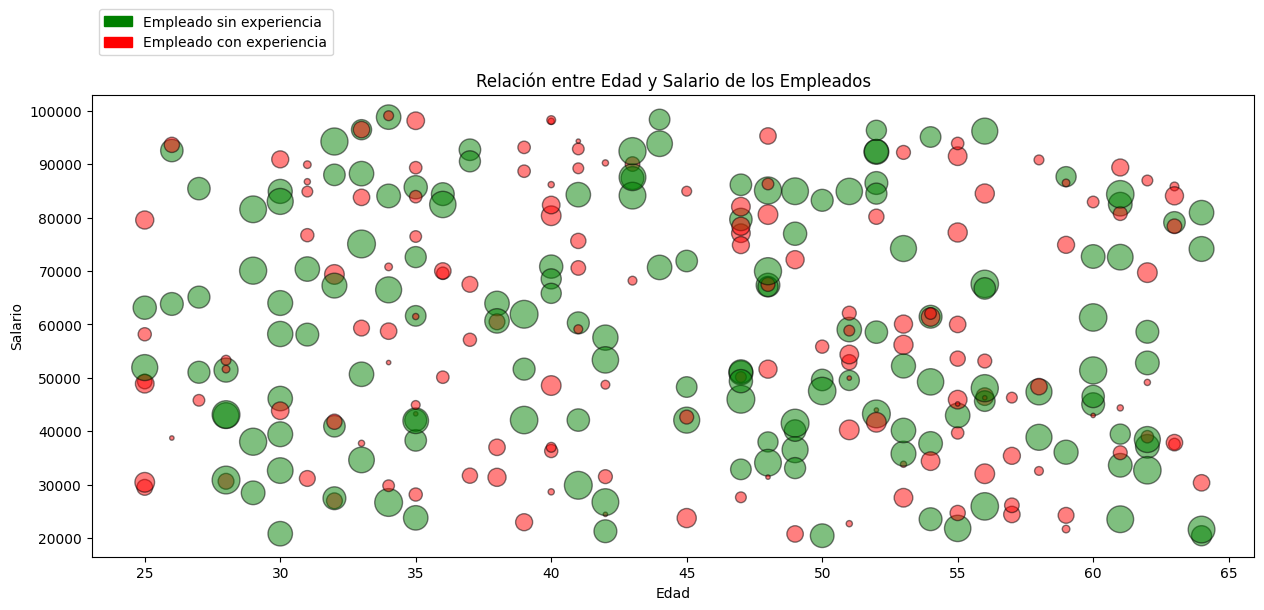

In [6]:
import matplotlib.patches as mpatches

departamentos = ['Recursos Humanos', 'Ventas', 'Marketing', 'Finanzas', 'Desarrollo', 'Soporte Técnico', 'Legal', 'IT', 'Operaciones', 'Investigación y Desarrollo']
gender = ["M","F"]

empleados_faker = {
    'first_name': [fake.first_name() for _ in range(300)],
    'last_name': [fake.last_name() for _ in range(300)],
    'age': [np.random.randint(25,65) for i in range(300)],
    'years_experience': [np.random.randint(1,41) for i in range(300)],
    'gender': [np.random.choice(gender) for i in range(300)],
    'salary': [np.random.randint(20000,100000) for i in range(300)],
    'department': [np.random.choice(departamentos) for i in range(300)]
    }

df_empleados = pd.DataFrame(empleados_faker)

df_empleados["average"] = df_empleados["years_experience"] > df_empleados["years_experience"].mean()

print(df_empleados)
print(f"Promedio de años de experiencia: {np.ceil(df_empleados["years_experience"].mean())}")

# Histograma 
bins = int(np.ceil(np.log2(df_empleados["salary"].count()) + 1))
plt.figure(figsize=(15,6))
plt.hist(df_empleados["salary"],bins=bins,edgecolor="black")
plt.ylabel("Número de empleados")
plt.xlabel("Salario")
plt.title("Distribución de salarios en 300 empleados")
plt.xticks(rotation=90)


# Dispersión
plt.figure(figsize=(15,6))
plt.scatter(df_empleados["age"],
            df_empleados["salary"], 
            c= df_empleados["average"].map({True: 'green', False:'red'}),
            alpha=0.5,
            s=df_empleados["years_experience"]*10,
            edgecolors="black")

plt.title('Relación entre Edad y Salario de los Empleados')
plt.xlabel('Edad')
plt.legend(handles=[
    mpatches.Circle((0, 0), 10, color='green', label='Empleado sin experiencia'),
    mpatches.Circle((0, 0), 10, color='red', label='Empleado con experiencia')
],loc='upper left', bbox_to_anchor=(0, 1.2))
plt.ylabel('Salario')
plt.show()




      first_name  last_name gender  weight  height
0        Tristan    Douglas      X   67.21    1.79
1        Cynthia     Moreno      M   88.89    1.93
2         Austin       Sims      F   83.46    1.69
3          Maria    Richard      M   98.34    1.66
4      Katherine  Zimmerman      F   62.29    1.76
..           ...        ...    ...     ...     ...
295        Sarah    Morales      M   63.76    1.73
296        Karen      Kelly      F   60.34    1.70
297         Ross   Phillips      F   96.71    1.63
298         Kyle      Stout      F   57.36    1.90
299  Christopher      Villa      M   58.70    1.95

[300 rows x 5 columns]


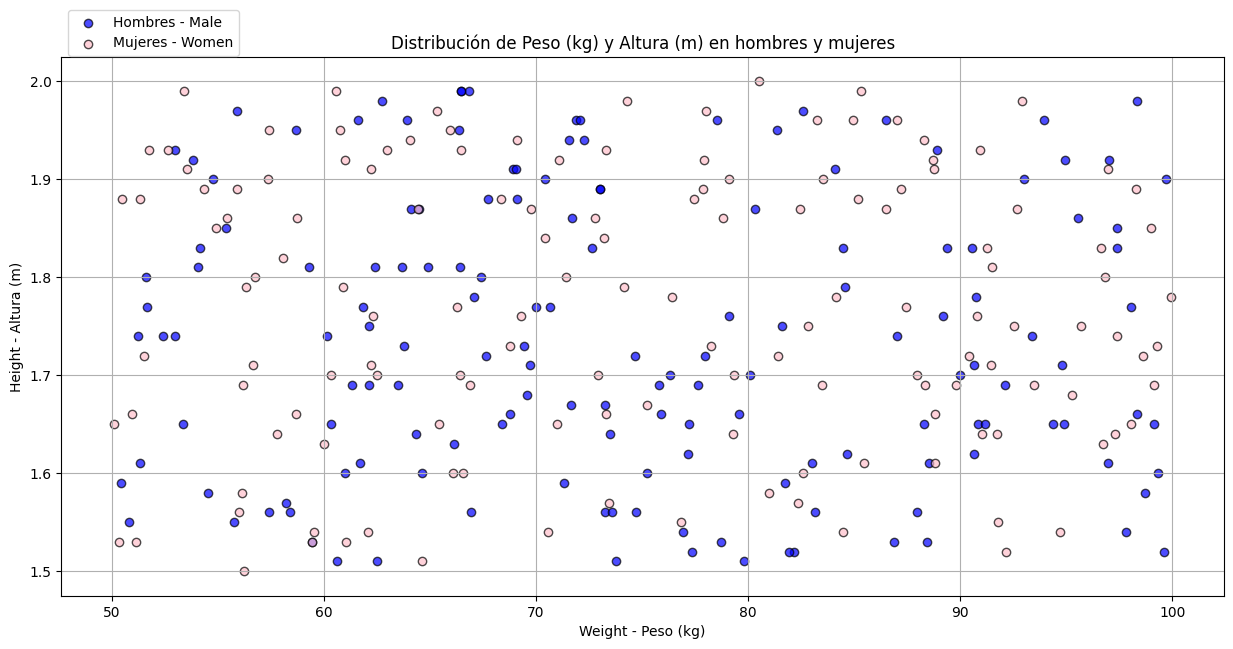

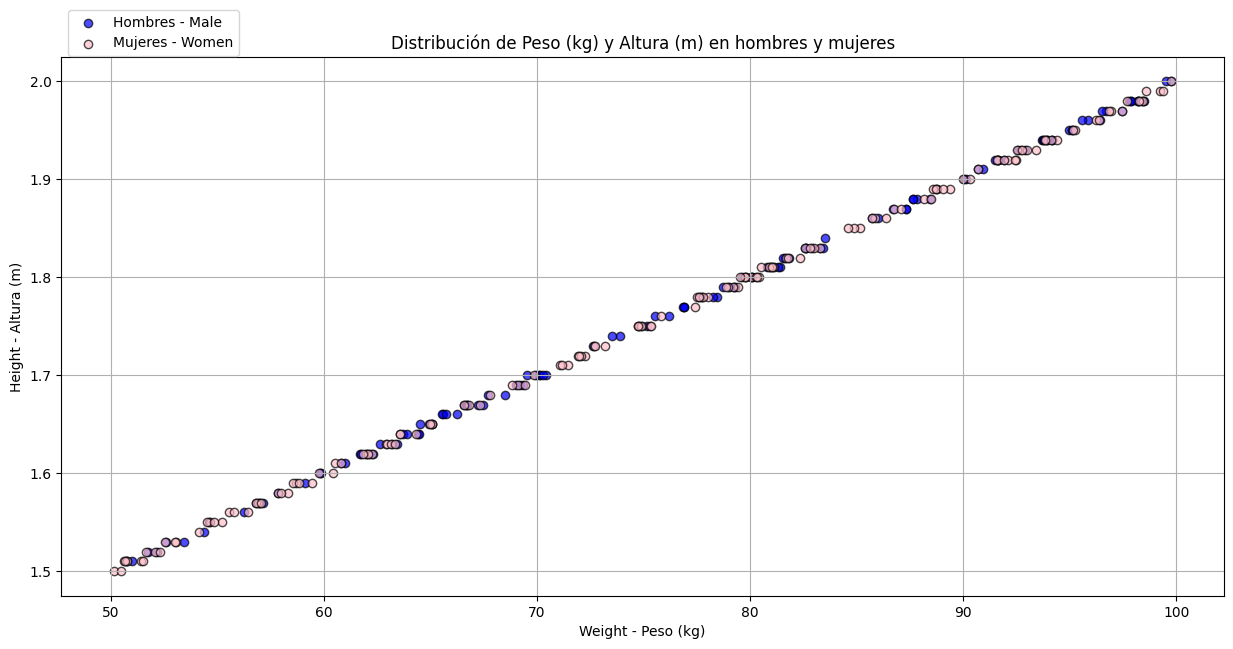

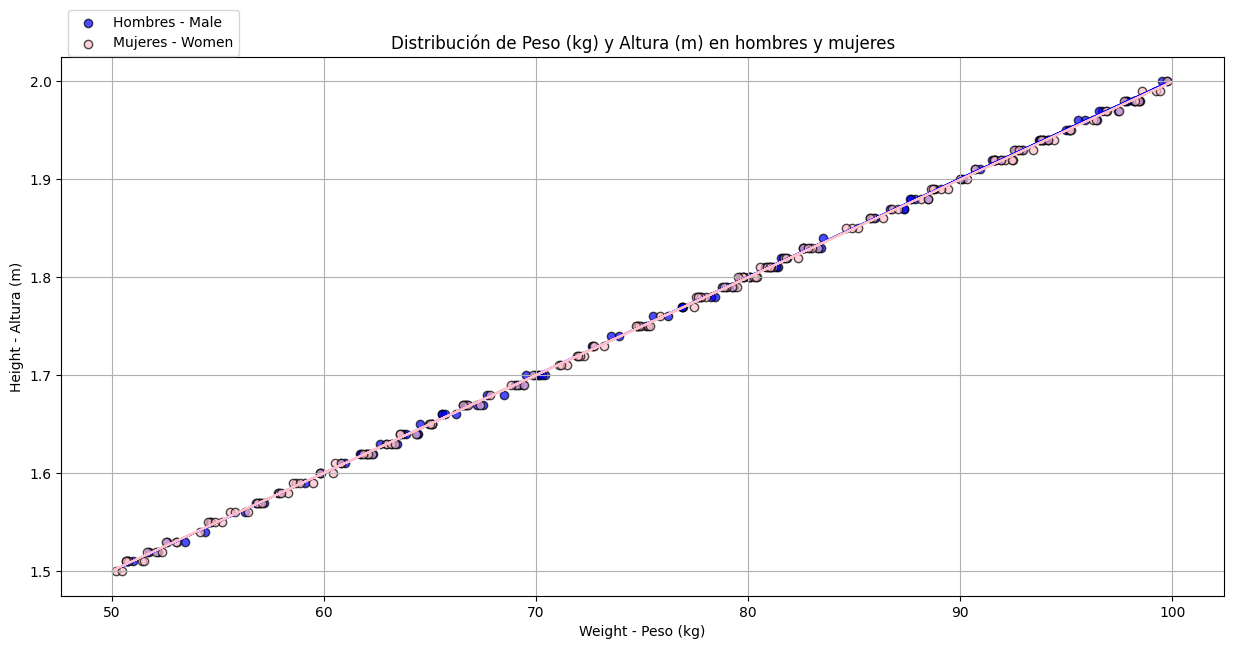

In [4]:
personas_faker = {
    'first_name': [fake.first_name() for _ in range(300)],
    'last_name': [fake.last_name() for _ in range(300)],
    'gender': [fake.passport_gender() for _ in range(300)],
    'weight': [round(np.random.uniform(50.0,100),2) for i in range(300)],
    'height': [round(np.random.uniform(1.50,2.00,),2) for i in range(300)]
}

df_personas = pd.DataFrame(personas_faker)
df_personas2 = pd.read_csv('archivos_csv/personas.csv')

# Representamos la altura y el peso en su medida adecuada
#metros = 0.0254   
#kilos = 0.453592

#df_personas["height"],df_personas["weight"] = df_personas["height"] * metros, df_personas["weight"] * kilos
#df_personas2["height"],df_personas2["weight"] = df_personas2["height"] * metros, df_personas2["weight"] * kilos


print(df_personas)

x_men,y_men = df_personas[df_personas["gender"] == "M"]["weight"],df_personas[df_personas["gender"] == "M"]["height"]
x_wom,y_wom = df_personas[df_personas["gender"] == "F"]["weight"],df_personas[df_personas["gender"] == "F"]["height"]
x_men2,y_men2 = df_personas2[df_personas2["gender"] == "M"]["weight"],df_personas2[df_personas2["gender"] == "M"]["height"]
x_wom2,y_wom2 = df_personas2[df_personas2["gender"] == "F"]["weight"],df_personas2[df_personas2["gender"] == "F"]["height"]

def graficoScatterWH(xM,yM,xW,yW):
    plt.figure(figsize=(15,7))
    plt.scatter(xM,yM,c="blue",edgecolors="black",label="Hombres - Male",alpha=0.7)
    plt.scatter(xW,yW,c="pink",edgecolors="black", label="Mujeres - Women",alpha=0.7)
    plt.title("Distribución de Peso (kg) y Altura (m) en hombres y mujeres")
    plt.ylabel("Height - Altura (m)")
    plt.xlabel("Weight - Peso (kg)")
    plt.legend(loc="upper left", bbox_to_anchor=(0,1.1)) 
    plt.grid()
    
graficoScatterWH(x_men,y_men,x_wom,y_wom)
graficoScatterWH(x_men2,y_men2,x_wom2,y_wom2)

# Calculando y dibujando la regresión lineal 
m_men, b_men = np.polyfit(x_men2, y_men2, 1)
m_wom, b_wom = np.polyfit(x_wom2, y_wom2, 1)

graficoScatterWH(x_men2,y_men2,x_wom2,y_wom2)
plt.plot(x_men, m_men * x_men + b_men, color='blue', linestyle='-')
plt.plot(x_wom, m_wom * x_wom + b_wom, color='pink', linestyle='-')
plt.show()

         Producto  Ventas
0           Anana   15821
1          Laptop    1003
2       Televisor   19164
3        Auto 0KM   15502
4  Destornillador    5624
5      Medialunas    1502


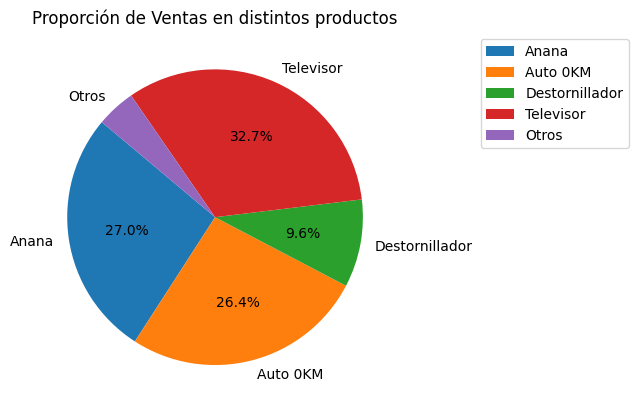

In [8]:
data = {
    'Producto': ['Anana', 'Laptop', 'Televisor', 'Auto 0KM', 'Destornillador', 'Medialunas'],
    'Ventas': [np.random.randint(1000,20000) for x in range (6)]
}


df_productos = pd.DataFrame(data)
print(df_productos)

# Calculamos el porcentajo de ventas
df_productos['Porcentaje'] = df_productos['Ventas'] / df_productos['Ventas'].sum() * 100
# Si el porcentaje es menor a cierto número, añadira el producto como "Otros"
df_productos['Etiqueta'] = np.where(df_productos['Porcentaje'] < 7, 'Otros', df_productos['Producto'])
df_final = df_productos.groupby('Etiqueta')['Ventas'].sum().reset_index()
df_final_ordenado = df_final.sort_values('Etiqueta', key=lambda x: x == 'Otros', ascending=True)


plt.pie(df_final_ordenado["Ventas"], 
        labels=df_final_ordenado["Etiqueta"], 
        autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '',
        startangle=140
        #,shadow=True
        )
plt.legend(loc="upper left", bbox_to_anchor=(1.2,1))
plt.title("Proporción de Ventas en distintos productos")
plt.show()

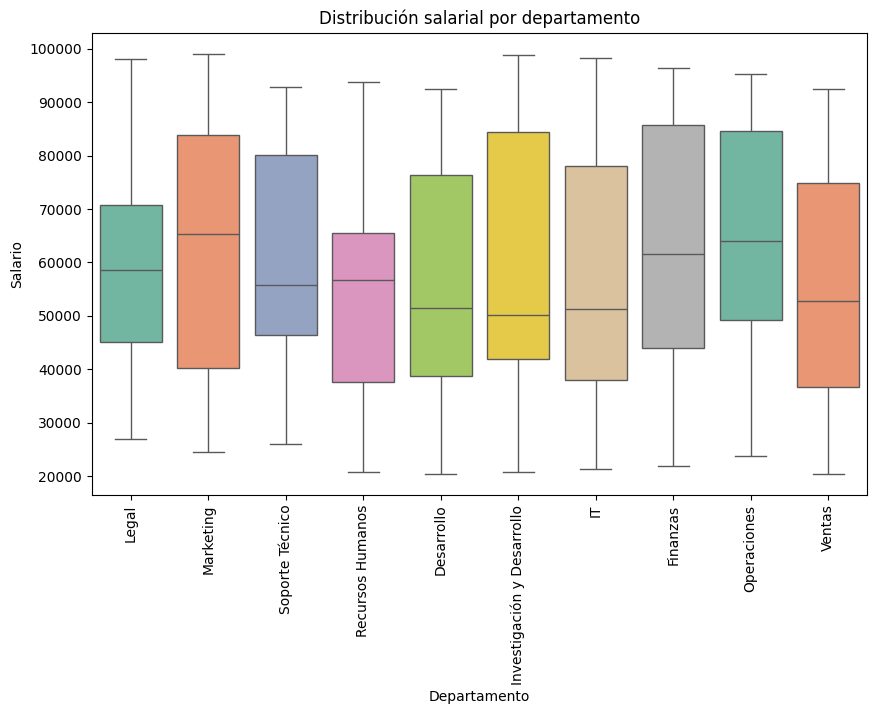

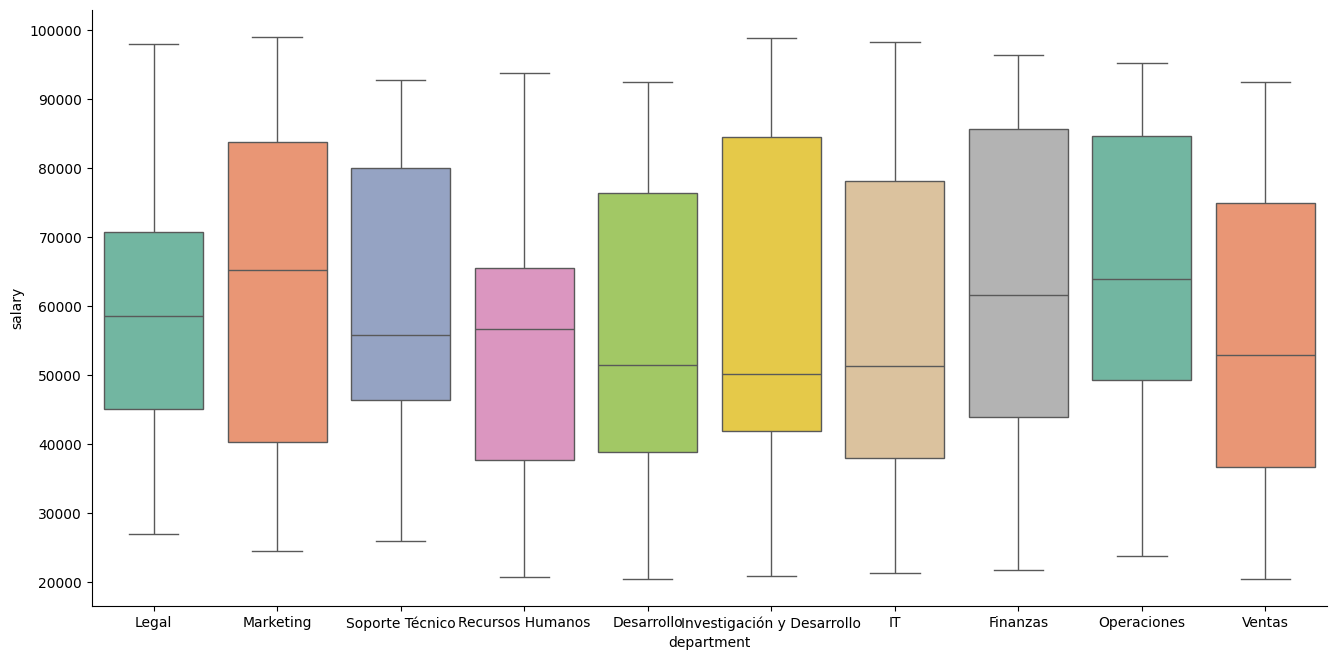

In [9]:
# Seaborn y Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="department",y="salary",data=df_empleados,hue="department",palette="Set2")
plt.title('Distribución salarial por departamento')
plt.xticks(rotation=90)
plt.xlabel("Departamento")
plt.ylabel('Salario')
plt.show()

# Uso de Catplot
g = sns.catplot(data=df_empleados,kind="box",x="department",y="salary",hue="department",palette="Set2")
g.fig.set_size_inches(16,7)

        Month    Product  Sales
0     January  Product_A   1200
1     January  Product_B    800
2     January  Product_C   1000
3    February  Product_A   1300
4    February  Product_B    850
5    February  Product_C   1100
6       March  Product_A   1250
7       March  Product_B    900
8       March  Product_C   1050
9       April  Product_A   1400
10      April  Product_B    950
11      April  Product_C   1200
12        May  Product_A   1350
13        May  Product_B   1100
14        May  Product_C   1300
15       June  Product_A   1450
16       June  Product_B   1050
17       June  Product_C   1250
18       July  Product_A   1550
19       July  Product_B   1150
20       July  Product_C   1350
21     August  Product_A   1500
22     August  Product_B   1100
23     August  Product_C   1400
24  September  Product_A   1650
25  September  Product_B   1200
26  September  Product_C   1450
27    October  Product_A   1600
28    October  Product_B   1250
29    October  Product_C   1500
30   Nov

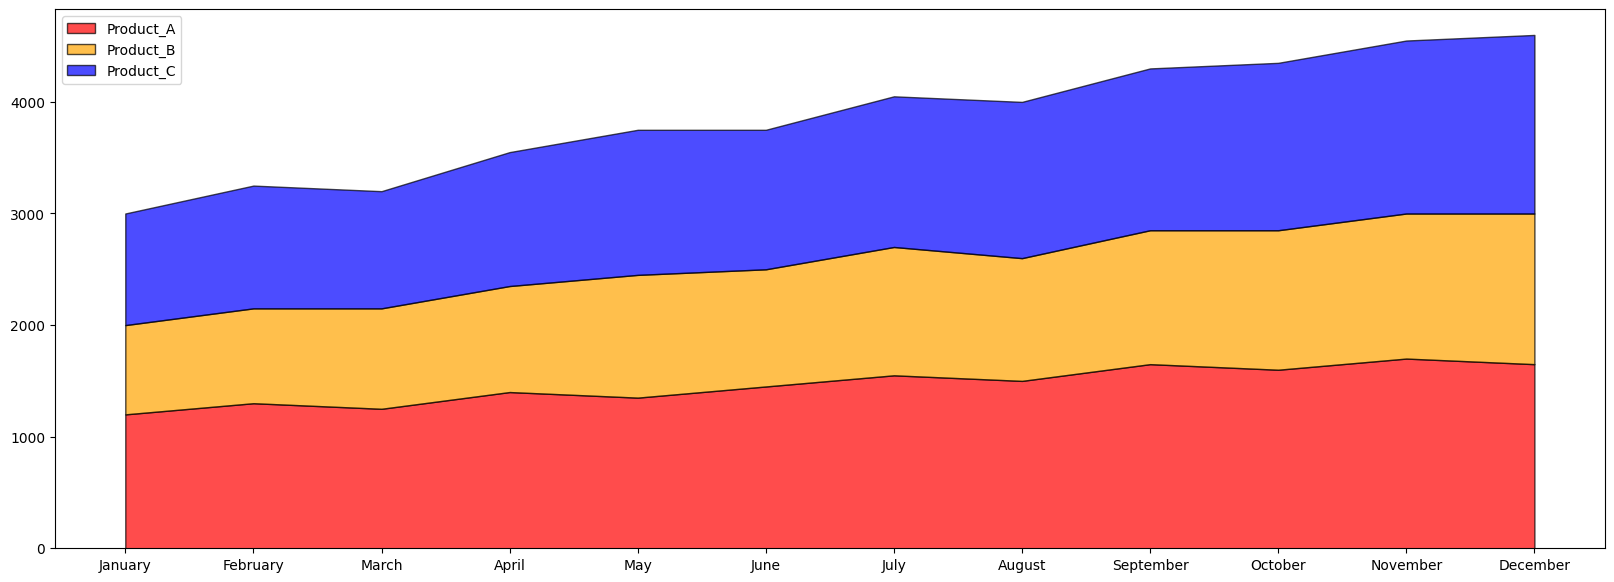

In [10]:
df_ventas = pd.read_csv("archivos_csv/ventas_meses.csv")
print(df_ventas)

colors = {"Product_A":"red","Product_B":"orange","Product_C":"blue"}
meses = df_ventas["Month"].drop_duplicates()

sales_list = []
color_list = []

# Gráfico de areas apiladas
for product,color in colors.items():
    y = df_ventas[df_ventas["Product"] == product]["Sales"]
    
    sales_list.append(y)
    color_list.append(color) 

plt.figure(figsize=(20,7))
plt.stackplot(meses,*sales_list,edgecolor="black",colors=color_list,alpha=0.7)
plt.legend(colors.keys(),loc="upper left")
plt.show()

    Edad  Salario  Horas_Trabajadas  Experiencia  Ahorros
0     25    35000                40            2     5000
1     30    45000                42            5    10000
2     35    60000                45           10    20000
3     40    75000                50           15    30000
4     28    38000                38            3     6000
5     32    48000                41            7    12000
6     38    67000                48           12    25000
7     45    85000                55           20    40000
8     50    92000                60           25    50000
9     55    98000                55           30    60000
10    60   100000                50           35    70000
  Category_1  Category_2  Category_3
0          A           5           3
1          B           2           6
2          C           4           1
3          D           7           8
4          E           3           4
5          F           6           5
6          G           8           2
7       

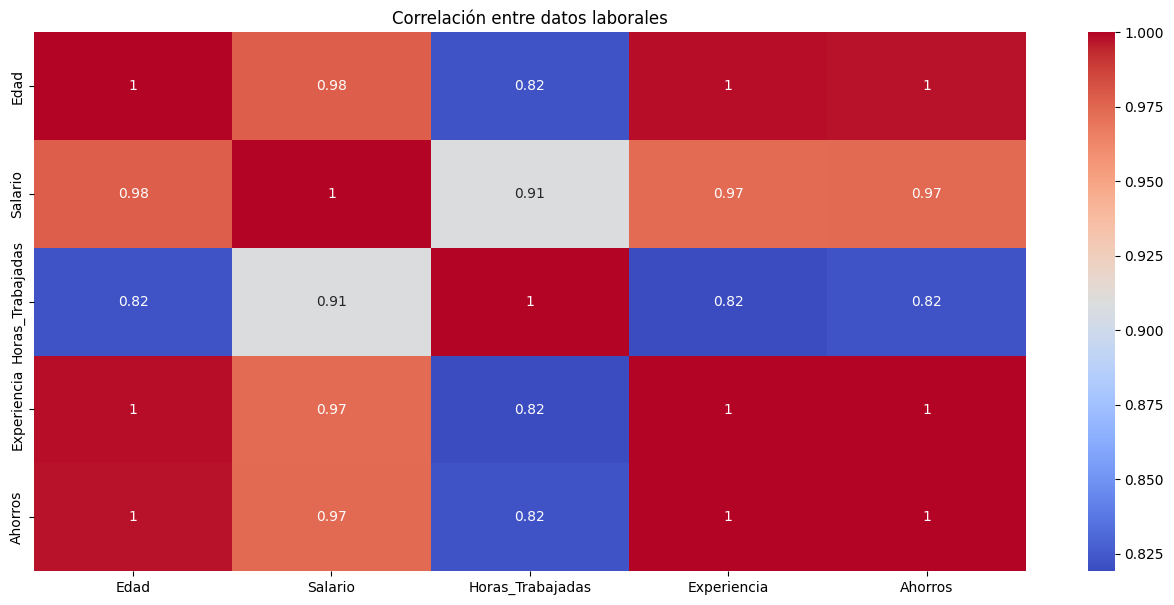

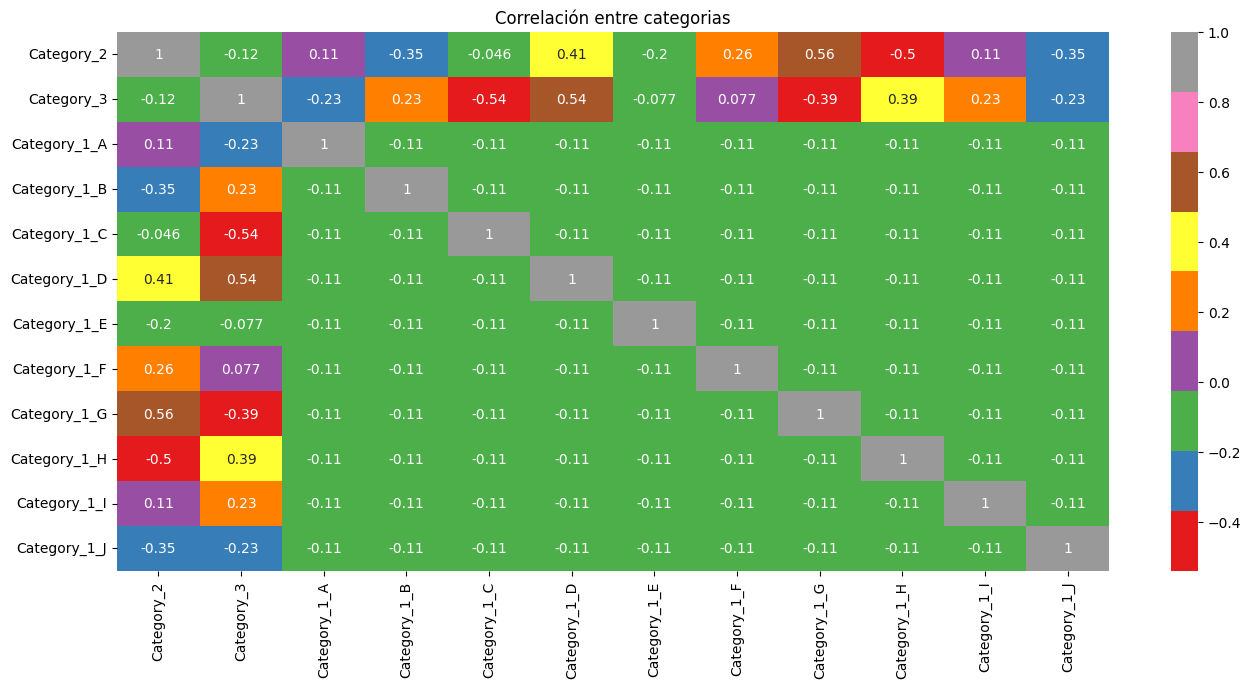

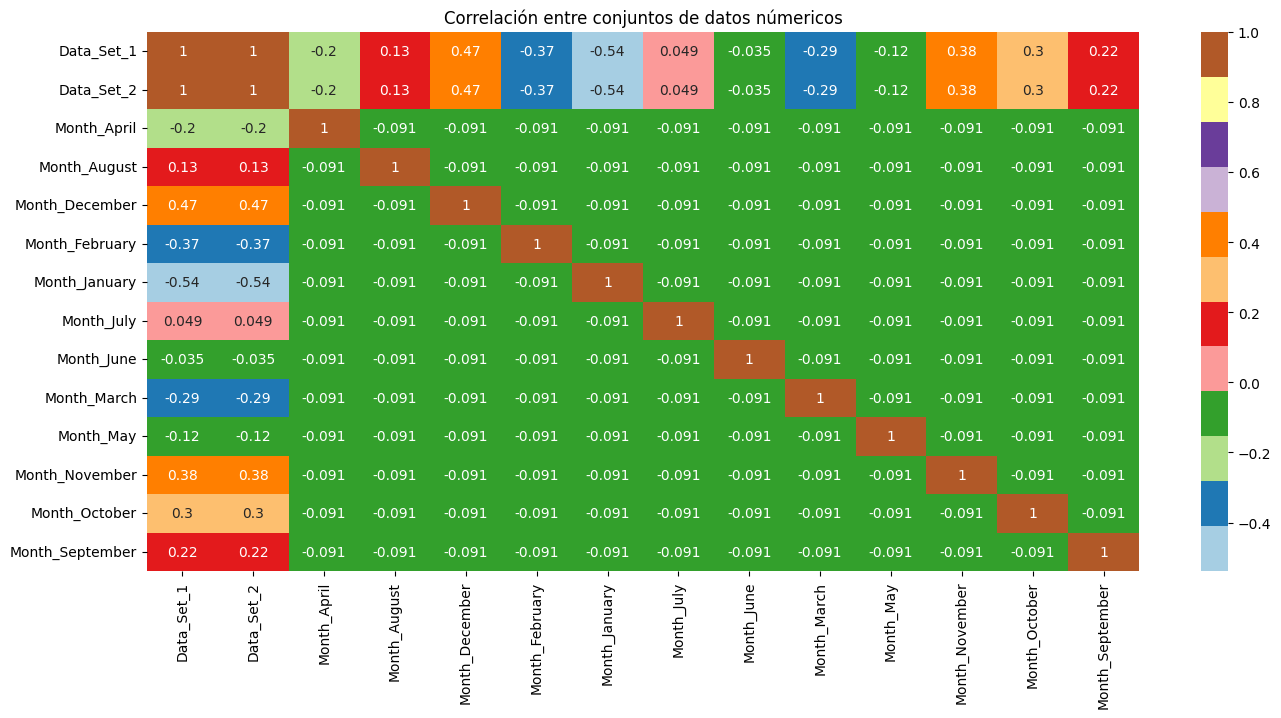

In [11]:
df_emp = pd.read_csv("archivos_csv/datos_emp.csv")
df_cat = pd.read_csv("archivos_csv/categorias.csv")
df_num = pd.read_csv("archivos_csv/datos_numericos.csv")

print(f"{df_emp}\n{df_cat}\n{df_num}")
# Datos laborales
correlation_emp = df_emp.corr()
# Datos categoricos
df_cat_final = pd.get_dummies(df_cat,columns=["Category_1"])
correlation_cat = df_cat_final.corr()
# Conjunto de números
df_num_final = pd.get_dummies(df_num,columns=["Month"])
correlation_num = df_num_final.corr()

# Mapas de calor
plt.figure(figsize=(16,7))
sns.heatmap(correlation_emp, annot=True,cmap="coolwarm")
plt.title("Correlación entre datos laborales")

plt.figure(figsize=(16,7))
sns.heatmap(correlation_cat,annot=True,cmap="Set1")
plt.title("Correlación entre categorias") # No tiene sentido con datos aleatorios

plt.figure(figsize=(16,7))
sns.heatmap(correlation_num,annot=True,cmap="Paired")
plt.title("Correlación entre conjuntos de datos númericos")

plt.show()

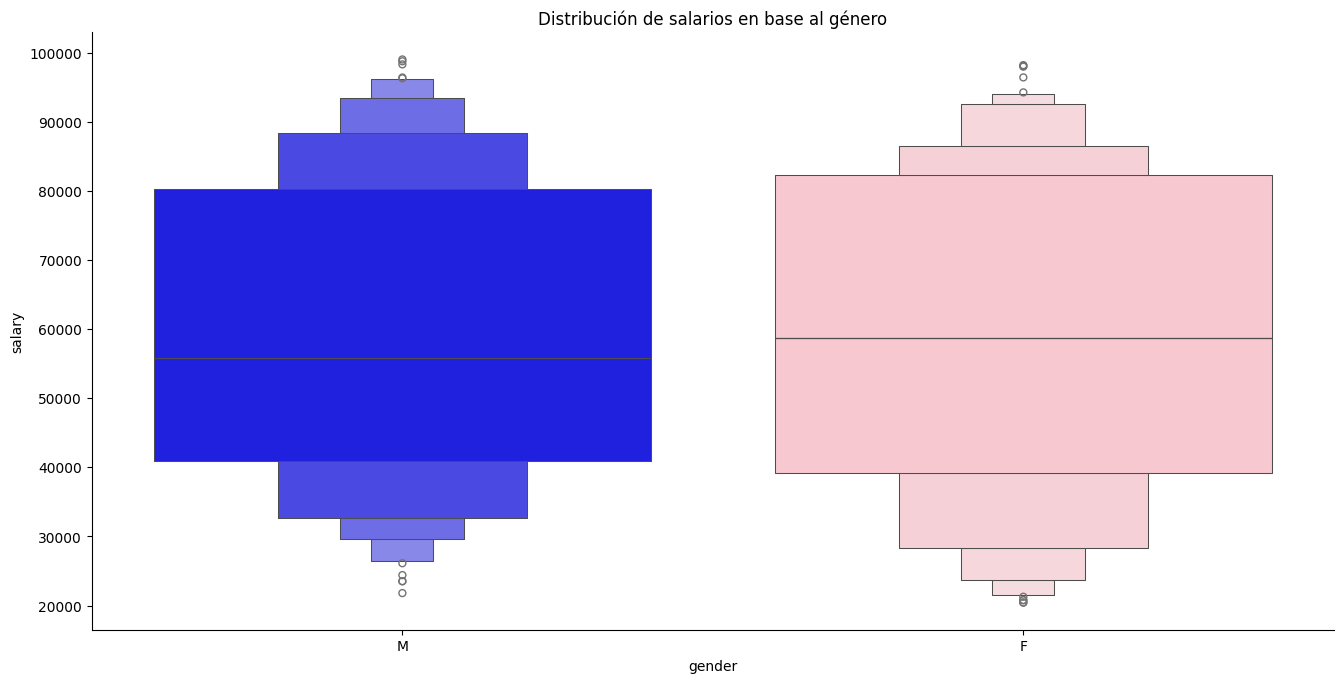

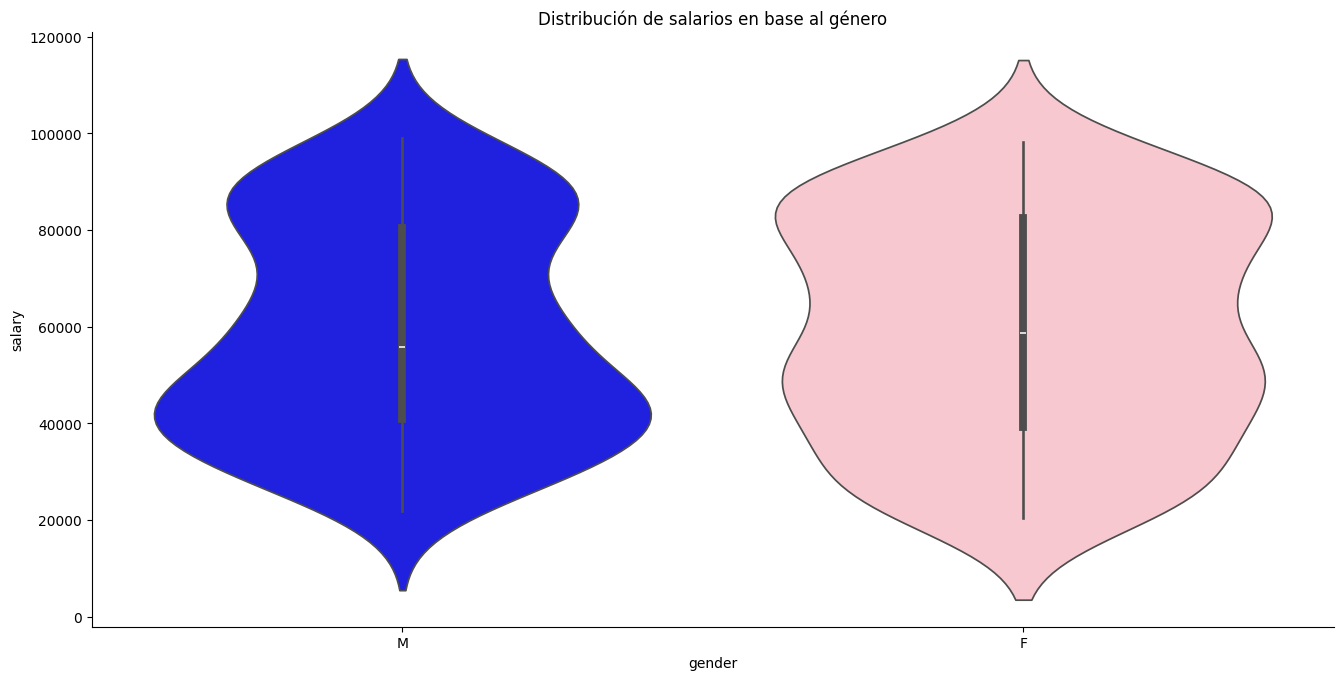

In [12]:
# Boxen Plot
g = sns.catplot(data = empleados_faker, 
                kind = 'boxen',
                x = 'gender',
                y = 'salary',
                hue='gender',
                palette={'M': "blue", 'F': "pink"})
g.fig.set_size_inches(16, 7)
plt.title("Distribución de salarios en base al género")

# Violin plot
g2 = sns.catplot(data= empleados_faker,
                     kind ='violin',
                     x ='gender',
                     y = 'salary',
                     hue='gender',
                     palette={'M': "blue", 'F':"pink"}
                     )

plt.title("Distribución de salarios en base al género")
g2.fig.set_size_inches(16,7)

In [14]:
# Usando Plotly para generar gráficos interactivos
fig = px.scatter( df_personas2, x = 'weight', y = 'height',
                  color = 'gender',
                  color_discrete_map={"M": "blue", "F": "pink"}, 
                  opacity = 0.5,    
                  trendline = 'ols') # 'ols' es la regresión lineal (mucho más simple)

# Propiedades del gráfico
fig.update_layout( title = 'Distribución de Peso (kg) y Altura (Mts) en hombres y mujeres',  
                   font = dict ( family = 'arial',
                                 size = 12,
                               color = 'black'),
                   template = 'simple_white',  
                   height = 400,  
                   width = 900)   

fig.update_yaxes( ticksuffix = ' Mts.' ) 
fig.update_xaxes( ticksuffix = ' Kg.' )

fig.show()

![Gráfico](img/distribucion.png)

In [9]:
fig2 = px.bar(df, x='Trimestre', y="Ventas", color="Productos",labels={'Ventas':'Ventas','Trimestre':'Trimestre'})
fig2.update_layout(title = 'Ventas de Productos por trimestre',  
                   font = dict ( family = 'arial',
                                 size = 12,
                               color = 'black'),
                   template = 'simple_white',  
                   height = 400,  
                   width = 900,
                   barmode='stack' # Se especifica que serán barras apiladas.
                )

fig2.show()



![Gráfico](img/prod_tris.png)

In [8]:
df_temperaturas = pd.read_csv("archivos_csv/temperaturas.csv")

fig3 = px.line(df_temperaturas,x="Fecha",y="Temperatura",color="Ciudad")
fig3.update_layout(title = 'Evolución de la temperatura en dos ciudades en Enero de 2024',  
                   font = dict ( family = 'arial',
                                 size = 12,
                               color = 'black'),
                   template = 'simple_white',  
                   height = 400,  
                   width = 900,)
fig3.update_yaxes(ticksuffix= '°C')
fig3.show()

![Gráfico](img/temperaturas.png)

In [7]:
df_encuesta = pd.read_csv("archivos_csv/encuesta.csv")
fig4 = px.pie(df_encuesta,values='Porcentaje', names='Navegador',title="Navegadores más utilizados")
#fig4.update_traces(rotation=45) # Angulo de inicio 
fig4.update_traces(marker=dict(line=dict(color='black', width=2))) # Bordes alrededor de las porciones
fig4.show()

![Gráfico](img/encuesta.png)

In [6]:
df_actividad = pd.read_csv("archivos_csv/actividad.csv")

fig5 = px.area(df_actividad,x='Mes',y="Usuarios_Activos",title="Actividad de usuarios en distintas redes sociales",color="Red_Social")
fig5.show()

![Gráfico](img/actividad.png)

In [5]:
# Gráficos financieros
import plotly.graph_objs as go

df_btc = yf.Ticker('BTC-USD').history(period='1Y')
df_eth = yf.Ticker('ETH-USD').history(period='1Y')

# OHLC (Open,High,Low,Close)
fig6 = go.Figure( data = go.Ohlc( x = df_btc.index,
                                 open = df_btc['Open'],
                                 high = df_btc['High'],
                                 low = df_btc['Low'],
                                 close = df_btc['Close']))

fig6.update_layout(title="Evolución de BTC en un Año",xaxis_title="Fecha",yaxis_title="Precio")

# Candlestick (velas japonesas)
fig7 = go.Figure( data = go.Candlestick( x = df_btc.index,
                                 open = df_btc['Open'],
                                 high = df_btc['High'],
                                 low = df_btc['Low'],
                                 close = df_btc['Close']))

fig7.update_layout(title="Evolución de BTC en un Año",xaxis_title="Fecha",yaxis_title="Precio")


fig7.update_yaxes( fixedrange = False,rangemode = 'nonnegative')
fig6.update_yaxes( fixedrange = False,rangemode = 'nonnegative')

fig6.show()
fig7.show()

![Gráfico](img/btc.png)

![Gráfico](img/btc_candlestick.png)

In [44]:
fig8 = go.Figure()

fig8.add_trace(go.Candlestick(
    x=df_btc.index,
    open=df_btc["Open"],
    high=df_btc["High"],
    low=df_btc["Low"],
    close=df_btc["Close"],
    name="BTC-USD",
))

fig8.add_trace(go.Candlestick(
    x=df_eth.index,
    open=df_eth["Open"],
    high=df_eth["High"],
    low=df_eth["Low"],
    close=df_eth["Close"],
    name="ETH-USD",
))

fig8.update_layout(title="Comparación entre BTC - ETH a lo largo de un año",xaxis_title="Fecha",yaxis_title="Precio")
fig8.show()

![Gráfico](img/comp.png)

![Gráfico](img/comp_eth.png)

![Gráfico](img/comp_btc.png)